# Note Object Detection
Description: Object Detection Program for FRC Notes

## Resources
* Note model from [RoboFlow](https://universe.roboflow.com/worbots-4145/2024-frc)


In [33]:
# import necessary libraries
from roboflow import Roboflow
import supervision as sv
import cv2
import matplotlib.pyplot as plt

## Import RoboFlow Model and Necessary Requirements
### obtain results

loading Roboflow workspace...
loading Roboflow project...


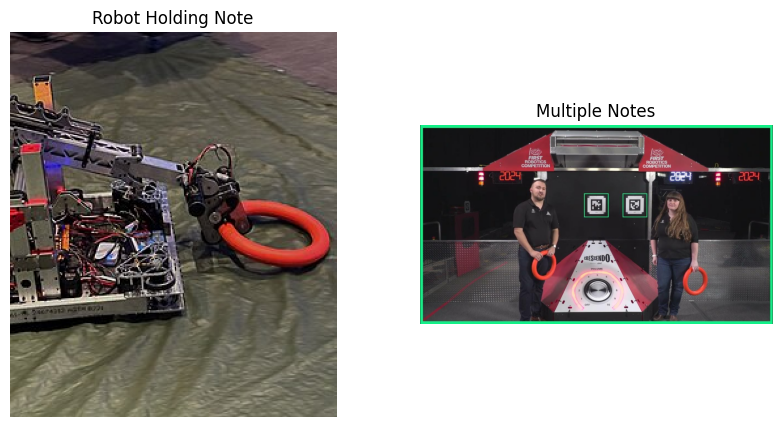

In [34]:
rf = Roboflow(api_key="PHdCfHHJVoVwM0ee9rP7")
project = rf.workspace().project("2024-frc")
model = project.version(8).model
image = "robot-holding-note.jpg"
multi_note_image = "notes.jpg"
robot_image = cv2.imread(image)
multi_note_image = cv2.imread(multi_note_image)

# Display both images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(robot_image, cv2.COLOR_BGR2RGB))
plt.title("Robot Holding Note")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(multi_note_image, cv2.COLOR_BGR2RGB))
plt.title("Multiple Notes")
plt.axis('off')
plt.show()

multi_note_result = model.predict(multi_note_image, confidence=40, overlap=30).json()
robot_result = model.predict(robot_image, confidence=40, overlap=30).json()

In [35]:
def filter_result(result, target_class_ids):
    """
    Filters the predictions in the result to only include those with class IDs in target_class_ids.
    
    Args:
        result (dict): The result containing predictions and image.
        target_class_ids (set): A set of class IDs to filter by.
        
    Returns:
        dict: A filtered result containing only the specified class IDs.
    """
    filtered_predictions = [
        pred for pred in result["predictions"]
        if pred["class_id"] in target_class_ids
    ]
    
    return {
        "predictions": filtered_predictions,
        "image": result["image"]
    }

multi_note_result_filtered = filter_result(multi_note_result, {3})
robot_result_filtered = filter_result(robot_result, {3})

# Display the filtered results
print("Filtered Multi Note Result:", multi_note_result_filtered)
print("Filtered Robot Result:", robot_result_filtered)

Filtered Multi Note Result: {'predictions': [{'x': 450.0, 'y': 513.5, 'width': 102.0, 'height': 97.0, 'confidence': 0.8835287690162659, 'class': 'note', 'class_id': 3, 'detection_id': 'e6ac788b-1ef8-4bb3-a1e6-17fc2aa7a943', 'image_path': array([[[  0,  42,   0],
        [133, 213,  70],
        [138, 238,  32],
        ...,
        [144, 235,  36],
        [142, 208,  75],
        [  0,  39,   0]],

       [[  0,  43,   0],
        [134, 213,  70],
        [138, 238,  32],
        ...,
        [144, 235,  36],
        [142, 209,  74],
        [  0,  39,   0]],

       [[  0,  43,   0],
        [136, 213,  68],
        [140, 238,  32],
        ...,
        [144, 236,  35],
        [142, 210,  71],
        [  0,  41,   0]],

       ...,

       [[  0,  38,   0],
        [143, 209,  73],
        [146, 239,  28],
        ...,
        [146, 232,  42],
        [143, 208,  75],
        [  0,  40,   0]],

       [[  0,  39,   0],
        [143, 210,  71],
        [146, 239,  26],
        ...,
 

In [36]:
def label_filter(result, target_class):
    """
    Filters the labels in the result to only include those that match the target class.
    
    Args:
        result (dict): The result containing predictions.
        target_class (str): The class label to filter by.
        
    Returns:
        list: A list of filtered labels.
    """
    labels = [item["class"] for item in result["predictions"] if item["class"] == target_class]

    for i in range(len(labels)):
        labels[i] = "note " + str(i + 1)

    return labels

multi_note_labels = label_filter(multi_note_result, "note")
robot_labels = label_filter(robot_result, "note")

print("Multi Note Labels:", multi_note_labels)
print("Robot Labels:", robot_labels)

Multi Note Labels: ['note 1', 'note 2']
Robot Labels: ['note 1']


In [37]:
def detection_filter(result, target_class_id):
    """
    Filters the detections in the result to only include those that match the target class.
    
    Args:
        result (dict): The result containing predictions.
        target_class (str): The class label to filter by.
        
    Returns:
        list: A list of filtered detections.
    """
    detection = sv.Detections.from_inference(result)
    return detection[detection.class_id == target_class_id]

multi_note_detections = detection_filter(multi_note_result, 3)
robot_detections = detection_filter(robot_result, 3)

print("Multi Note Detections:", multi_note_detections)
print("Robot Detections:", robot_detections)

Multi Note Detections: Detections(xyxy=array([[ 399.,  465.,  501.,  562.],
       [ 948.,  513., 1044.,  614.]]), mask=None, confidence=array([0.88352877, 0.87999505]), class_id=array([3, 3]), tracker_id=None, data={'class_name': array(['note', 'note'], dtype='<U13')}, metadata={})
Robot Detections: Detections(xyxy=array([[161., 129., 245., 181.]]), mask=None, confidence=array([0.92204046]), class_id=array([3]), tracker_id=None, data={'class_name': array(['note'], dtype='<U4')}, metadata={})


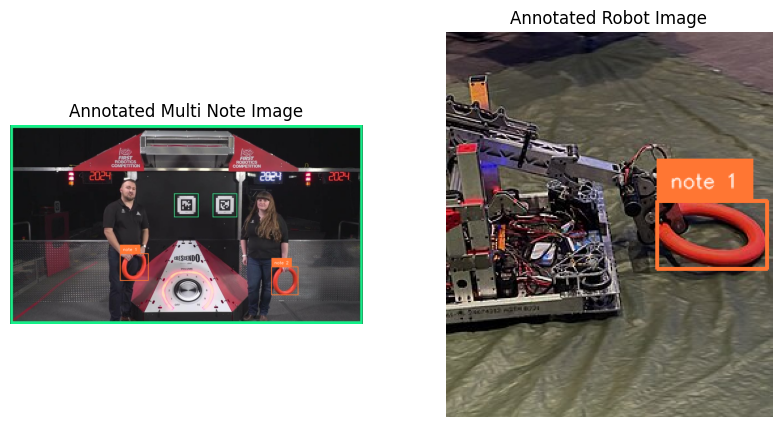

In [38]:
def annotator(image, detections, labels):
    """
    Creates an annotator for bounding boxes and labels.
    
    Returns:
        tuple: A tuple containing the label annotator and bounding box annotator.
    """
    
    # display detections using OpenCV
    label_annotator = sv.LabelAnnotator()
    bounding_box_annotator = sv.BoxAnnotator()

    image = image

    annotated_image = bounding_box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections, labels=labels)

    return annotated_image
annotated_multi_note_image = annotator(multi_note_image, multi_note_detections, multi_note_labels)
annotated_robot_image = annotator(robot_image, robot_detections, robot_labels)

# Display the annotated images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(annotated_multi_note_image, cv2.COLOR_BGR2RGB))
plt.title("Annotated Multi Note Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(annotated_robot_image, cv2.COLOR_BGR2RGB))
plt.title("Annotated Robot Image")
plt.axis('off')
plt.show()